**CROSS-VALIDATION**

In [1]:
# load data
import pandas as pd
df = pd.read_csv("../../../data/melb_data.csv")

In [2]:
# define target and features
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
y = df.Price
X = df[cols_to_use]

In [3]:
# separate train and valid data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [4]:
# pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [5]:
# cross-validation
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [301615.03450966 303143.49091344 287316.47967778 236087.57655869
 260385.2736474 ]


In [6]:
# average of scores
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277709.5710613945


In [7]:
# useful function
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    aux_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(aux_pipeline, X, y,
                              cv=3,
                              scoring='neg_mean_absolute_error')
    return scores.mean()

In [8]:
# test different parameters
parameters = [50+i*50 for i in range(8)]
parameters

results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

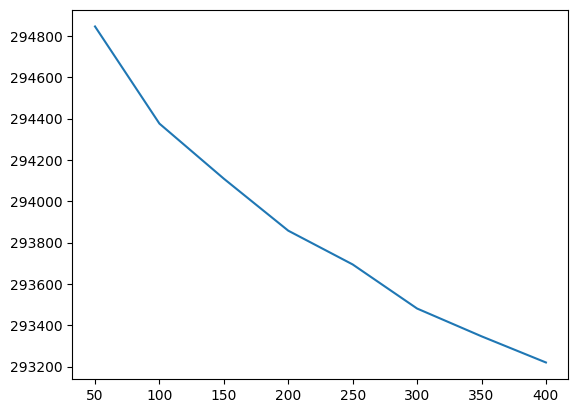

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()